# Rarity of Near-Earth Object (NEO) Close Approaches to Earth

__Team Members:__ Surya Suresh Sriraman, Nivetha Sivakumar, Aravind Raju

# Abstract

__Problem:__

Near-Earth Objects (NEOs) pose a potential threat and necessitate close monitoring for planetary defens.

__Methodology:__

This study investigates factors influencing asteroid close approach rarity and leverages machine learning to predict rarity and classify encounters. We utilize a NASA CNEOS dataset filtered for close approaches within 10 lunar distances (LD). The dataset includes features like velocity, distance, and absolute magnitude, with "Rarity" as the target variable. We employ various machine learning models, including Logistic Regression, Decision Tree, KNN, SVM and Neural Network, to identify the key factors influencing rarity and develop a classification model to categorize encounters based on predicted rarity. 

__Major Outcomes:__

The project compares the performance of these models to determine the most effective approach for NEO encounter classification. The research endeavors to provide accurate predictions of NEO encounter rarity, facilitating a deeper understanding of asteroid dynamics. By leveraging machine learning models, insights are gained into the factors influencing the rarity of NEO close approaches. These outcomes are instrumental in guiding planetary defense strategies and optimizing mission planning for space exploration endeavors. Ultimately, the study contributes to the advancement of knowledge in the field of asteroid dynamics and strengthens efforts to mitigate potential hazards posed by NEOs.

# Introduction

Understanding the characteristics and frequency of asteroid close approaches is crucial for space exploration and potential hazard mitigation. NASA's Center for NEO Studies (CNEOS) tracks NEOs, providing valuable data for scientific research. This project investigates the factors contributing to the rarity of close approaches (Research Question 1) and utilizes machine learning models to predict rarity and classify encounters based on predicted rarity (Research Questions 2 & 3).

We leverage a dataset obtained from the __CNEOS website__ containing information on various NEO characteristics, including "Rarity" as the target variable. The data is filtered for close approaches within 10 LD, focusing on potentially hazardous encounters. By employing machine learning models, we aim to:

1) Identify the key factors (e.g., size, velocity) that most significantly contribute to the rarity of close approaches.
2) Develop multiple machine learning models to accurately predict the rarity of Earth close approaches for asteroids using the provided dataset.
3) Compare the effectiveness of different machine learning models in classifying NEO encounters based on their performance on unseen data.

This project contributes to a better understanding of NEO encounters and explores the potential of machine learning for classifying and predicting their rarity, aiding in space exploration and potential hazard mitigation strategies.


__Approach__ :

1) __Exploratory Data Analysis (EDA):__
    - Descriptive statistics will be used to gain insights into each variable in the dataset.
    - Correlation analysis will identify relationships between variables.  

2) __Data Preparation:__
    - Identify and handle missing values through techniques like imputation or deletion (justifying the chosen method).
    - Address outliers using methods like winsorization if necessary.
    - Standardize or normalize numerical features to ensure consistent scales and improve model performance.
    - Based on EDA insights, create new features that might enhance model performance.
    - Encode categorical features using appropriate techniques like one-hot encoding.

3) __Prepped Data EDA:__    
    - Perform EDA on the prepped data after handling nulls and outliers.

4) __Machine Learning Model Construction:__
    - Employ techniques like recursive feature elimination or feature importance ranking to identify the most informative features 
    - Use VIF to eliminate columns that shows multi-collinearity.
    - Apply dimensionality reduction methods, such as principal component analysis (PCA), to reduce the dataset's complexity while retaining essential information.
    - Build five distinct models to predict asteroid close-approach rarity: 
        - Logistic regression
        - Decision tree
        - KNN
        - SVM
        - Neural network 

5) __Model Selection:__
    - Evaluate the trained models on the unseen dataset using metrics like accuracy, precision, recall, f-1 score
    - Compare the performance of each model and identify the best performing one based on the chosen metrics.

6) __Ensemble Model:__
    - Select weak leaners with low performance and create an ensemble model to enhance overall prediction robustness.
    - Implement and compare ensemble techniques like stacking, voting and bagging.
    
This project is feasible within the given time frame as the scope is manageable, focusing on specific variables to address the research questions effectively.

# Exploratory Data Analysis

## Import Statement

In [1]:
# Import required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats.mstats import winsorize
from sklearn.feature_selection import VarianceThreshold
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from imblearn.combine import SMOTEENN
from sklearn.feature_selection import mutual_info_regression
from collections import Counter
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

## Data Loading

In [2]:
neo_df = pd.read_csv(r"https://raw.githubusercontent.com/s-surya-s/DAV-6150/main/NEO%20Earth%20Close%20Approaches.csv", sep = ",", engine = 'python').dropna(subset=['Rarity'])
neo_df = neo_df.drop(columns = ['Close-Approach (CA) Date'])
neo_df['Rarity'] = neo_df['Rarity'].astype(str)
neo_df.head()

,Object,CA DistanceNominal (au),CA DistanceMinimum (au),V relative(km/s),V infinity(km/s),H(mag),Diameter,Rarity
0,509352 (2007 AG),0.00963,0.00962,8.69,8.65,20.2,250 m - 550 m,2.0
1,4660 Nereus (1982 DB),0.02080,0.02077,5.54,5.52,18.8,0.33±0.05 km,2.0
2,(2009 BW2),0.01646,0.01644,4.44,4.41,25.1,25 m - 57 m,0.0
3,(2020 DK),0.02132,0.00738,9.90,9.89,26.1,16 m - 36 m,0.0
4,(2019 DB),0.02328,0.00563,7.02,7.00,26.1,16 m - 36 m,0.0


In [3]:
neo_df.shape

(17356, 8)

In [4]:
neo_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17356 entries, 0 to 17358
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Object                   17356 non-null  object 
 1   CA DistanceNominal (au)  17356 non-null  float64
 2   CA DistanceMinimum (au)  17356 non-null  float64
 3   V relative(km/s)         17356 non-null  float64
 4   V infinity(km/s)         17337 non-null  float64
 5   H(mag)                   17356 non-null  float64
 6   Diameter                 17356 non-null  object 
 7   Rarity                   17356 non-null  object 
dtypes: float64(5), object(3)
memory usage: 1.2+ MB


In [5]:
# Select numeric columns
neo_num = neo_df.select_dtypes(include=['number'])

# Select categorical columns
neo_cat = neo_df.select_dtypes(include=[object, bool])

# Display summary statistics for numeric columns
print("Numeric Columns:")
display(neo_num.describe())

# Display summary statistics for categorical columns
print("Categorical Columns:")
display(neo_cat.describe())

Numeric Columns:


,CA DistanceNominal (au),CA DistanceMinimum (au),V relative(km/s),V infinity(km/s),H(mag)
count,17356.000000,17356.000000,17356.000000,17337.000000,17356.000000
mean,0.014057,0.012178,10.305718,10.260372,25.763189
std,0.007245,0.007348,5.195121,5.208161,2.430345
min,0.000050,0.000000,0.220000,0.220000,14.400000
25%,0.008050,0.005650,6.657500,6.600000,24.675000
50%,0.014640,0.012050,9.360000,9.320000,26.100000
75%,0.020370,0.018420,12.990000,12.950000,27.300000
max,0.025700,0.025690,41.970000,41.970000,33.200000


Categorical Columns:


,Object,Diameter,Rarity
count,17356,17356,17356
unique,9832,630,7
top,(2019 BE5),12 m - 27 m,0.0
freq,33,359,12584


## Univariate Analysis

In [6]:
# Function for Univariate Analysis

def Univariate_EDA(df, col):
    '''
    Performs Univariate Analysis

    Args:
    - df: Dataframe for Univariate analysis
    - col: Column in the df for Univariate analysis

    Returns:
    None
    '''
    
    print('\n','-'*20, col,'-'*20)

    # Temporarily remove null values to view the distribution
    df = df[df[col].notnull()]
    
    # get summary statistics
    print('Summary Statistics')
    display(df[col].describe())
    
    if df[col].dtype == 'object' or df[col].dtype == 'bool':
        # Display unique values
        if len(df[col].unique())<=10:
            print('Unique Values')
            display(df[col].unique())
        else:
            print('Note: The graph displays only the top 20 frequent values')

        # Create a bar plot of the value counts
        plt.figure(figsize=(6, 3))
        plt.title(col)

        # Get value counts for the variable
        frequency = df[col].value_counts().head(20)
        sns.barplot(x=frequency.index, y=frequency.values, palette="viridis")
        plt.title(col)
        plt.ylabel("Counts")
        plt.tick_params(axis='x', rotation=90)

        # Display plot
        plt.tight_layout()
        plt.show()
        
        print("Insights:")
        if len(df[col].unique()) == 1:
            print(f"The {col} has only one unique value, {df[col].unique()[0]}")
        else:
            print("The {} column is comprised of {} distinct categorical values, with the most frequently occurring value being '{}'".format(col, len(df[col].unique()),df[col].mode()[0]))
    
    if df[col].dtype == 'float64' or df[col].dtype == 'int64':

        plt.figure(figsize=(6, 3))
        plt.suptitle(col)

        # Plot histogram
        plt.subplot(1, 2, 1)
        #sns.histplot(data=df, x=col, kde=True, color='skyblue')
        df[col].hist()

        # Plot boxplot
        plt.subplot(1, 2, 2)
        sns.boxplot(data=df, x=col, color='green')

        # Display plot
        plt.tight_layout()
        plt.show()

        print("Insights:")
        # Check skewness and distribution
        if df[col].median() == df[col].mean():
            skewtext = 'the median equals the mean. Plot shows normal distribution.'
        elif df[col].median() > df[col].mean():
            skewtext = 'median exceeds mean. Plot shows left skewness.'
        else:
            skewtext = 'mean exceeds median. Plot shows right skewness.'

        print(f'Summary statistics, histogram, and boxplot indicate {skewtext}\nThe values range between {df[col].min()} and {df[col].max()}.')

        # Outliers detection
        q1 = np.quantile(df[col], 0.25)
        q3 = np.quantile(df[col], 0.75)
        iqr = q3 - q1
        upper_bound = q3 + (1.5 * iqr)
        lower_bound = q1 - (1.5 * iqr)
        outlier = (df[col] < lower_bound) | (df[col] > upper_bound)

        # Display outliers information
        if outlier.sum() > 0:
            print('Outliers Detected!')
            print('Outliers%: {}'.format(round(100 * outlier.mean(), 2)))

    return None


 -------------------- Object --------------------
Summary Statistics


count          17356
unique          9832
top       (2019 BE5)
freq              33
Name: Object, dtype: object

Note: The graph displays only the top 20 frequent values


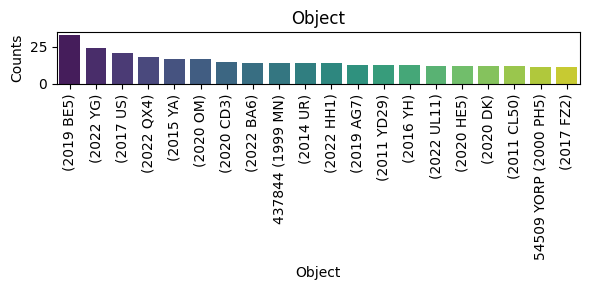

Insights:
The Object column is comprised of 9832 distinct categorical values, with the most frequently occurring value being '(2019 BE5)'

 -------------------- CA DistanceNominal (au) --------------------
Summary Statistics


count    17356.000000
mean         0.014057
std          0.007245
min          0.000050
25%          0.008050
50%          0.014640
75%          0.020370
max          0.025700
Name: CA DistanceNominal (au), dtype: float64

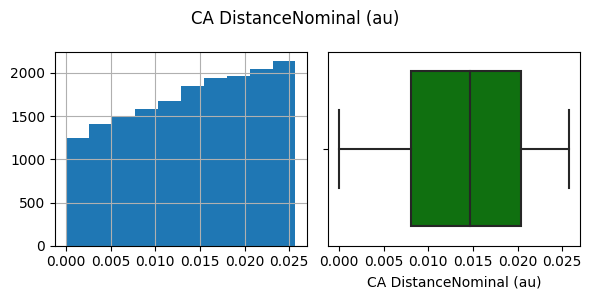

Insights:
Summary statistics, histogram, and boxplot indicate median exceeds mean. Plot shows left skewness.
The values range between 5e-05 and 0.0257.

 -------------------- CA DistanceMinimum (au) --------------------
Summary Statistics


count    17356.000000
mean         0.012178
std          0.007348
min          0.000000
25%          0.005650
50%          0.012050
75%          0.018420
max          0.025690
Name: CA DistanceMinimum (au), dtype: float64

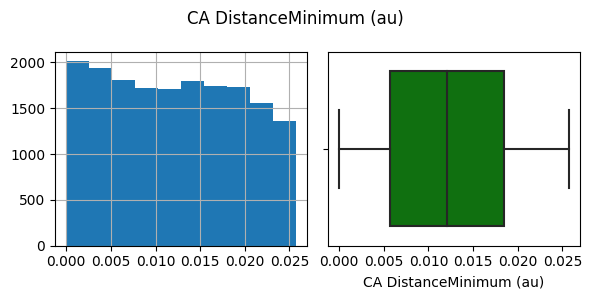

Insights:
Summary statistics, histogram, and boxplot indicate mean exceeds median. Plot shows right skewness.
The values range between 0.0 and 0.02569.

 -------------------- V relative(km/s) --------------------
Summary Statistics


count    17356.000000
mean        10.305718
std          5.195121
min          0.220000
25%          6.657500
50%          9.360000
75%         12.990000
max         41.970000
Name: V relative(km/s), dtype: float64

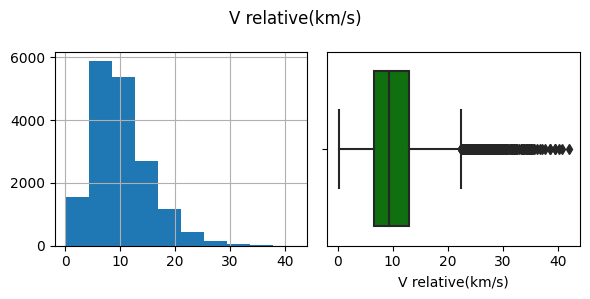

Insights:
Summary statistics, histogram, and boxplot indicate mean exceeds median. Plot shows right skewness.
The values range between 0.22 and 41.97.
Outliers Detected!
Outliers%: 2.85

 -------------------- V infinity(km/s) --------------------
Summary Statistics


count    17337.000000
mean        10.260372
std          5.208161
min          0.220000
25%          6.600000
50%          9.320000
75%         12.950000
max         41.970000
Name: V infinity(km/s), dtype: float64

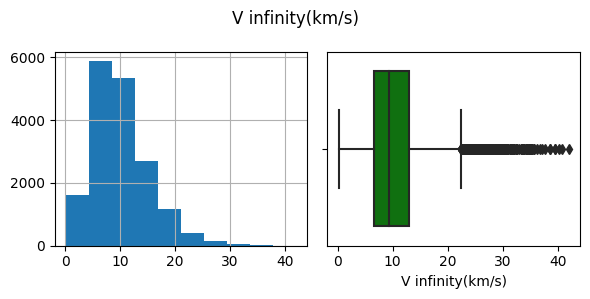

Insights:
Summary statistics, histogram, and boxplot indicate mean exceeds median. Plot shows right skewness.
The values range between 0.22 and 41.97.
Outliers Detected!
Outliers%: 2.84

 -------------------- H(mag) --------------------
Summary Statistics


count    17356.000000
mean        25.763189
std          2.430345
min         14.400000
25%         24.675000
50%         26.100000
75%         27.300000
max         33.200000
Name: H(mag), dtype: float64

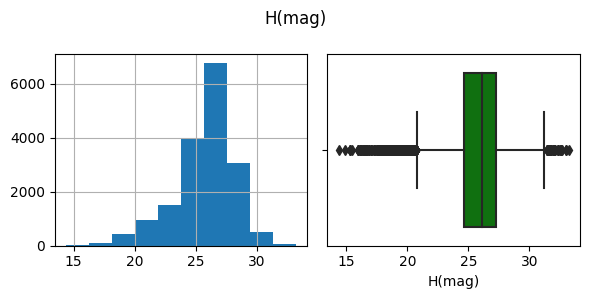

Insights:
Summary statistics, histogram, and boxplot indicate median exceeds mean. Plot shows left skewness.
The values range between 14.4 and 33.2.
Outliers Detected!
Outliers%: 5.38

 -------------------- Diameter --------------------
Summary Statistics


count             17356
unique              630
top       12 m -   27 m
freq                359
Name: Diameter, dtype: object

Note: The graph displays only the top 20 frequent values


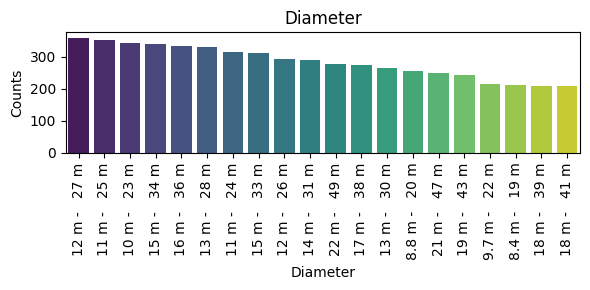

Insights:
The Diameter column is comprised of 630 distinct categorical values, with the most frequently occurring value being '12 m -   27 m'

 -------------------- Rarity --------------------
Summary Statistics


count     17356
unique        7
top         0.0
freq      12584
Name: Rarity, dtype: object

Unique Values


array(['2.0', '0.0', '1.0', '3.0', '4.0', '5.0', '6.0'], dtype=object)

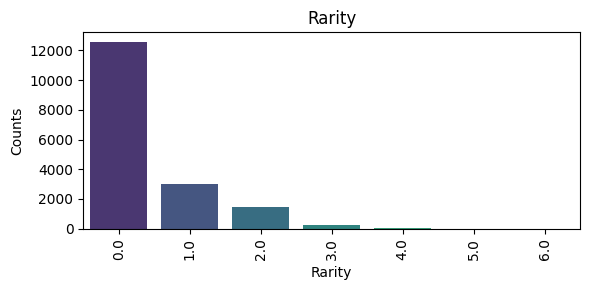

Insights:
The Rarity column is comprised of 7 distinct categorical values, with the most frequently occurring value being '0.0'


In [7]:
for col in neo_df.columns:    
    Univariate_EDA(neo_df, col)

## Bivariate Analysis

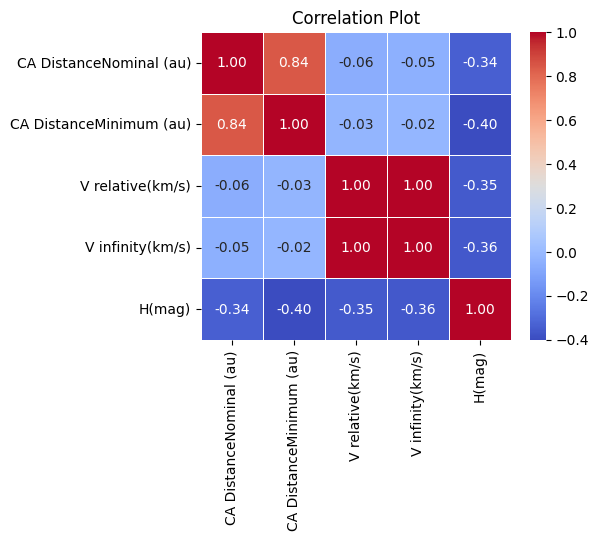

In [8]:
# Calculate the correlation matrix
correlation_matrix = neo_num.corr()

# Create a heatmap using seaborn
plt.figure(figsize=(5,4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Plot')
plt.show()

# Data Preparation

In [9]:
neo_df_preped = neo_df.copy()

## Handling Nulls

In [10]:
neo_df_preped.isnull().sum()

Object                      0
CA DistanceNominal (au)     0
CA DistanceMinimum (au)     0
V relative(km/s)            0
V infinity(km/s)           19
H(mag)                      0
Diameter                    0
Rarity                      0
dtype: int64

Dropping the null rows as it is only 0.10% of the total data values

In [11]:
neo_df_preped = neo_df_preped.dropna()

In [12]:
# sanity check
neo_df_preped.isnull().sum()

Object                     0
CA DistanceNominal (au)    0
CA DistanceMinimum (au)    0
V relative(km/s)           0
V infinity(km/s)           0
H(mag)                     0
Diameter                   0
Rarity                     0
dtype: int64

## Handling Duplicates

In [13]:
num_duplicates = neo_df_preped.duplicated().sum()
print("Number of duplicated rows:", num_duplicates)

Number of duplicated rows: 1


## Handling Outliers

In [14]:
def outlier_perc(df, col):
    """
    Calculate the percentage of outliers near the upper and lower bounds in a given column of a DataFrame.
    
    Parameters:
        df (DataFrame): The DataFrame containing the column.
        col (str): The name of the column for which to calculate the outlier percentage.
        
    Returns:
        float, float: The percentage of outliers near the upper and lower bounds, respectively.
    """
    
    q1 = np.quantile(df[col], 0.25)
    q3 = np.quantile(df[col], 0.75)
    iqr = q3 - q1
    upper_bound = q3 + (1.5 * iqr)
    lower_bound = q1 - (1.5 * iqr)
    lower_outlier = df[col] < lower_bound
    upper_outlier = df[col] > upper_bound

    return lower_outlier.mean(),upper_outlier.mean()

In [15]:
for col in neo_num.columns: 
    # Calculate the outlier percentage for the current column
    lower_outlier_percent, upper_outlier_percent, = outlier_perc(neo_df_preped, col)
    # Winsorize the column using the calculated outlier percentage
    neo_df_preped[col] = winsorize(neo_df_preped[col], limits=[lower_outlier_percent, upper_outlier_percent])

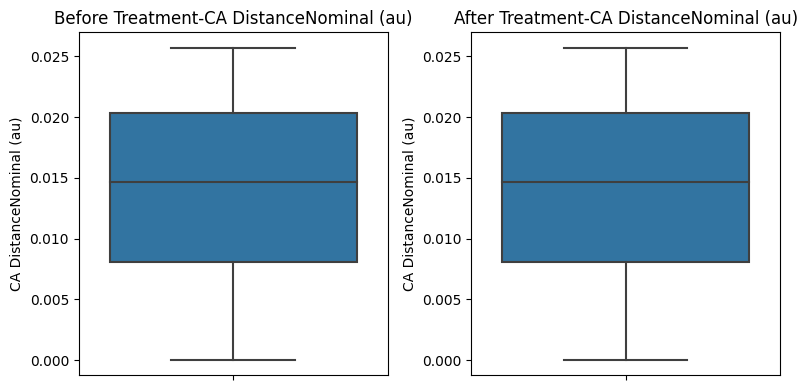

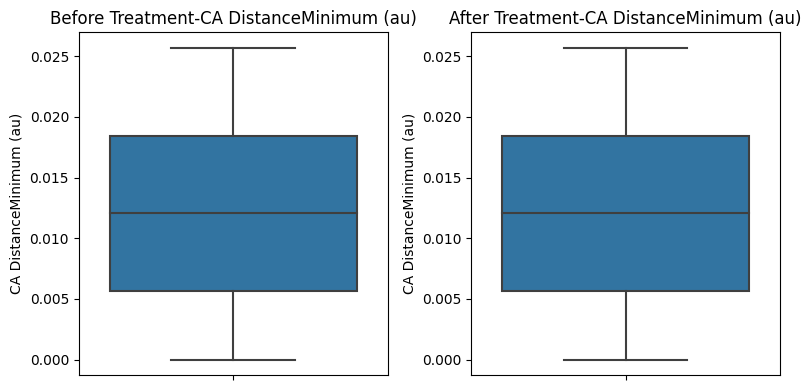

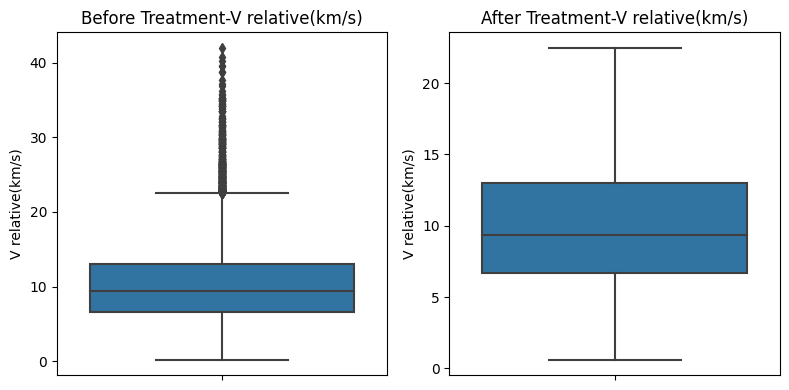

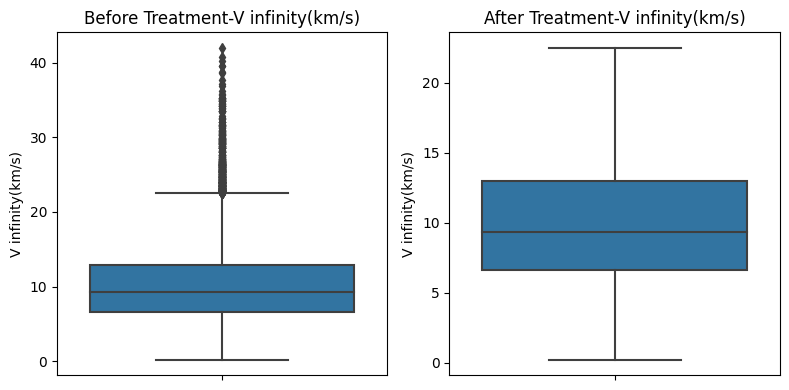

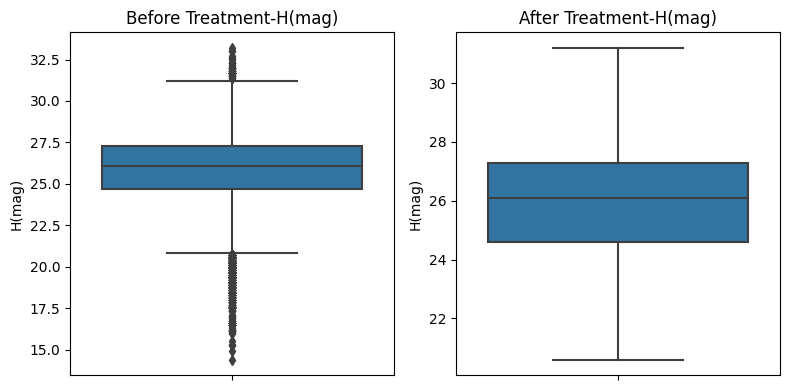

In [16]:
#Visualize the distribution before and after outlier treatment
for col in neo_num.columns:
    # Step 1: Create Box Plot Before Outlier Treatment
    plt.figure(figsize=(8, 4))
    plt.subplot(1, 2, 1)  # Subplot for before outlier treatment
    sns.boxplot(y=neo_df[col])
    plt.title(f'Before Treatment-{col}')
    
    # Step 3: Create Box Plot After Outlier Treatment
    plt.subplot(1, 2, 2)  # Subplot for after outlier treatment
    sns.boxplot(y=neo_df_preped[col])
    plt.title(f'After Treatment-{col}')
    
    plt.tight_layout()  # Adjust layout to prevent overlap
    plt.show()

## Handling Variable Diameter and handling outliers

In [17]:
def process_value(value):
    """
    Process a value string and extract lower and upper bounds.

    Parameters:
    value (str): The input string containing the value.

    Returns:
    tuple: A tuple containing the lower and upper bounds.
    """

    # Check if the value contains '±', 'km', and doesn't contain 'Â'
    if '±' in value and 'km' in value and 'Â' not in value:
        parts = value.split('±')
        numeric_values = [float(part.split()[0]) for part in parts]
        lower_bound = (numeric_values[0] - numeric_values[1]) * 1000
        upper_bound = (numeric_values[0] + numeric_values[1]) * 1000
        
    # Check if the value contains '±', 'km', and contains 'Â'
    if '±' in value and 'km' in value and 'Â' in value:
        parts = value.split('Â±')
        numeric_values = [float(part.split()[0]) for part in parts]
        lower_bound = (numeric_values[0] - numeric_values[1]) * 1000
        upper_bound = (numeric_values[0] + numeric_values[1]) * 1000
        
    # Check if the value contains 'km' but not '±', '-' or ' m'
    elif 'km' in value and '±' not in value and '-' not in value and ' m' not in value:
        parts = value.split('km')
        numeric_value = float(parts[0].strip())
        lower_bound = numeric_value * 1000
        upper_bound = numeric_value * 1000
        
    # Check if the value contains '-' and 'm' but not ' km' or '±'
    elif '-' in value and 'm' in value and ' km' not in value and '±' not in value: 
        parts = value.split()
        numeric_values = []
        for val in parts:
            try:
                numeric_values.append(float(val))
            except ValueError:
                pass
        lower_bound = numeric_values[0]
        upper_bound = numeric_values[1]
        
    # Check if the value contains '-' and 'm' and ' km' but not '±'
    elif '-' in value and 'm' in value and ' km' in value and '±' not in value: 
        parts = value.split()
        numeric_values = []
        for val in parts:
            try:
                numeric_values.append(float(val))
            except ValueError:
                pass
        lower_bound = numeric_values[0]
        upper_bound = numeric_values[1] * 1000
    
    return lower_bound, upper_bound

In [18]:
neo_df_preped[['lower_bound_diameter', 'upper_bound_diameter']] = neo_df_preped['Diameter'].apply(lambda x: pd.Series(process_value(x)))
neo_df_preped = neo_df_preped.drop(columns = ['Diameter'])


 -------------------- lower_bound_diameter --------------------
Summary Statistics


count    17337.000000
mean        45.735321
std        138.456959
min          0.610000
25%          9.200000
50%         16.000000
75%         31.000000
max       6100.000000
Name: lower_bound_diameter, dtype: float64

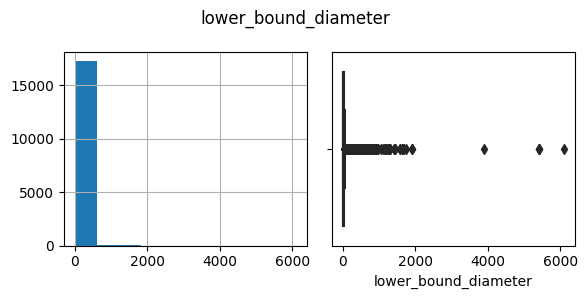

Insights:
Summary statistics, histogram, and boxplot indicate mean exceeds median. Plot shows right skewness.
The values range between 0.61 and 6100.0.
Outliers Detected!
Outliers%: 13.21

 -------------------- upper_bound_diameter --------------------
Summary Statistics


count    17337.000000
mean        94.211859
std        226.964594
min          1.400000
25%         21.000000
50%         35.000000
75%         69.000000
max       6400.000000
Name: upper_bound_diameter, dtype: float64

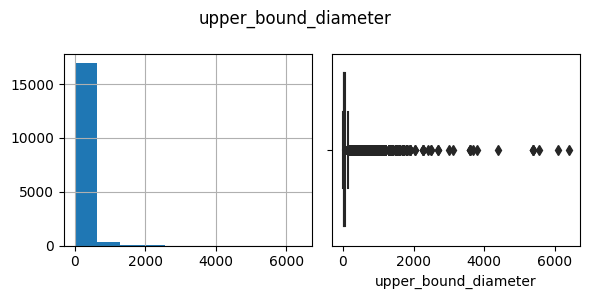

Insights:
Summary statistics, histogram, and boxplot indicate mean exceeds median. Plot shows right skewness.
The values range between 1.4 and 6400.0.
Outliers Detected!
Outliers%: 12.86


In [19]:
col = ['lower_bound_diameter', 'upper_bound_diameter']
for i in col:    
    Univariate_EDA(neo_df_preped, i)

In [20]:
col = ['lower_bound_diameter', 'upper_bound_diameter']
for i in col: 
    # Calculate the outlier percentage for the current column
    lower_outlier_percent, upper_outlier_percent, = outlier_perc(neo_df_preped, i)
    # Winsorize the column using the calculated outlier percentage
    neo_df_preped[i] = winsorize(neo_df_preped[i], limits=[lower_outlier_percent, upper_outlier_percent])

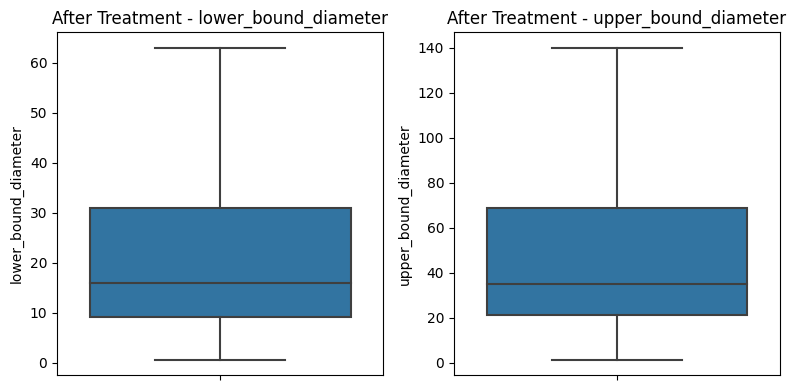

In [21]:
# Set the figure size
plt.figure(figsize=(8, 4))

# Iterate over each column in col
for i in range(len(col)):
    # Create subplots with two columns
    plt.subplot(1, 2, i+1)
    
    # Plot the boxplot for the current column
    sns.boxplot(y=neo_df_preped[col[i]])
    plt.title(f'After Treatment - {col[i]}')    
    plt.tight_layout()  # Adjust layout to prevent overlap

plt.show()

## Drop Redundant Columns

In [22]:
# Drop Object column as it is similar to a unique identifier
# Drop 'CA DistanceMinimum (au)', 'V infinity(km/s)' column as they are collinear with other columns

neo_df_preped.drop(columns = ['Object', 'CA DistanceMinimum (au)', 'V infinity(km/s)'], inplace=True)

## Handling Sparse Values

In [23]:
neo_df_preped.Rarity.value_counts()

Rarity
0.0    12565
1.0     3012
2.0     1431
3.0      278
4.0       48
5.0        2
6.0        1
Name: count, dtype: int64

In [24]:
## Merging 5 and 6 with 4 because of low count
value_mapping = {'5.0': '4.0', '6.0': '4.0'}  

# Use replace() with the dictionary
neo_df_preped['Rarity'] = neo_df_preped['Rarity'].replace(value_mapping)

neo_df_preped.Rarity.value_counts()

Rarity
0.0    12565
1.0     3012
2.0     1431
3.0      278
4.0       51
Name: count, dtype: int64

# Prepped Data Review


 -------------------- CA DistanceNominal (au) --------------------
Summary Statistics


count    17337.000000
mean         0.014068
std          0.007239
min          0.000050
25%          0.008060
50%          0.014650
75%          0.020370
max          0.025700
Name: CA DistanceNominal (au), dtype: float64

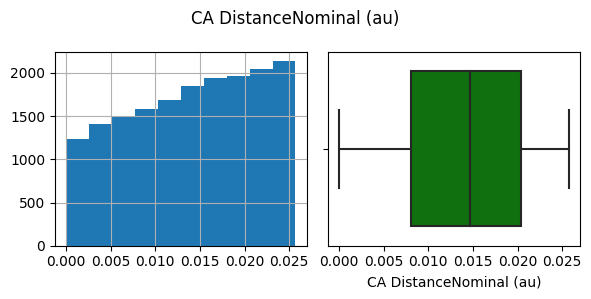

Insights:
Summary statistics, histogram, and boxplot indicate median exceeds mean. Plot shows left skewness.
The values range between 5e-05 and 0.0257.

 -------------------- V relative(km/s) --------------------
Summary Statistics


count    17337.000000
mean        10.198674
std          4.819519
min          0.620000
25%          6.670000
50%          9.360000
75%         12.990000
max         22.470000
Name: V relative(km/s), dtype: float64

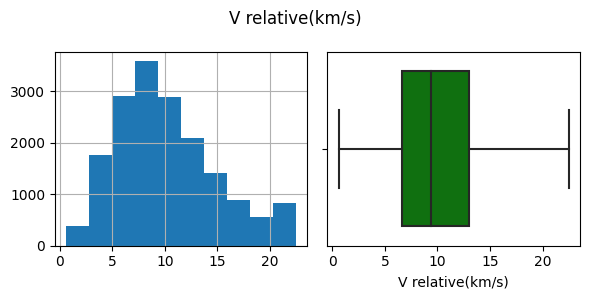

Insights:
Summary statistics, histogram, and boxplot indicate mean exceeds median. Plot shows right skewness.
The values range between 0.62 and 22.47.

 -------------------- H(mag) --------------------
Summary Statistics


count    17337.000000
mean        25.815499
std          2.258496
min         20.600000
25%         24.600000
50%         26.100000
75%         27.300000
max         31.200000
Name: H(mag), dtype: float64

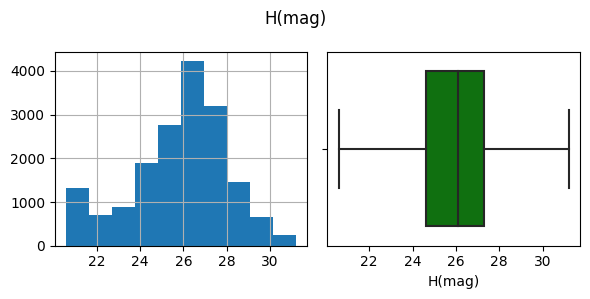

Insights:
Summary statistics, histogram, and boxplot indicate median exceeds mean. Plot shows left skewness.
The values range between 20.6 and 31.2.

 -------------------- Rarity --------------------
Summary Statistics


count     17337
unique        5
top         0.0
freq      12565
Name: Rarity, dtype: object

Unique Values


array(['2.0', '0.0', '1.0', '3.0', '4.0'], dtype=object)

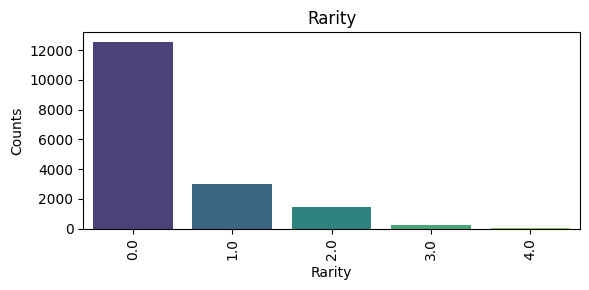

Insights:
The Rarity column is comprised of 5 distinct categorical values, with the most frequently occurring value being '0.0'

 -------------------- lower_bound_diameter --------------------
Summary Statistics


count    17337.000000
mean        23.300759
std         19.301589
min          0.610000
25%          9.200000
50%         16.000000
75%         31.000000
max         63.000000
Name: lower_bound_diameter, dtype: float64

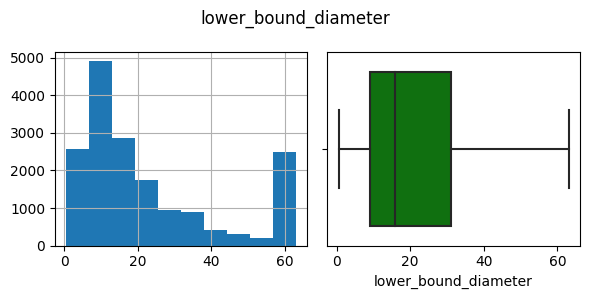

Insights:
Summary statistics, histogram, and boxplot indicate mean exceeds median. Plot shows right skewness.
The values range between 0.61 and 63.0.

 -------------------- upper_bound_diameter --------------------
Summary Statistics


count    17337.000000
mean        51.928823
std         42.868084
min          1.400000
25%         21.000000
50%         35.000000
75%         69.000000
max        140.000000
Name: upper_bound_diameter, dtype: float64

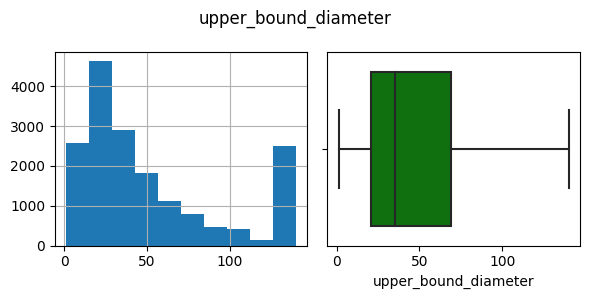

Insights:
Summary statistics, histogram, and boxplot indicate mean exceeds median. Plot shows right skewness.
The values range between 1.4 and 140.0.


In [25]:
for col in neo_df_preped.columns:    
    Univariate_EDA(neo_df_preped, col)

# Feature Engineering and Feature Selection

## Explanatory and Target Variable Seperation

In [26]:
X = neo_df_preped.drop(columns = 'Rarity')
y = neo_df_preped['Rarity']

## SMOTE + ENN

In [27]:
counter = Counter(y)
print(f'Before {Counter(y)}')

smenn = SMOTEENN()
X, y = smenn.fit_resample(X,y)

print(f'After {Counter(y)}')

Before Counter({'0.0': 12565, '1.0': 3012, '2.0': 1431, '3.0': 278, '4.0': 51})
After Counter({'4.0': 9048, '0.0': 8289, '3.0': 7383, '2.0': 7249, '1.0': 7177})


## Feature Selection

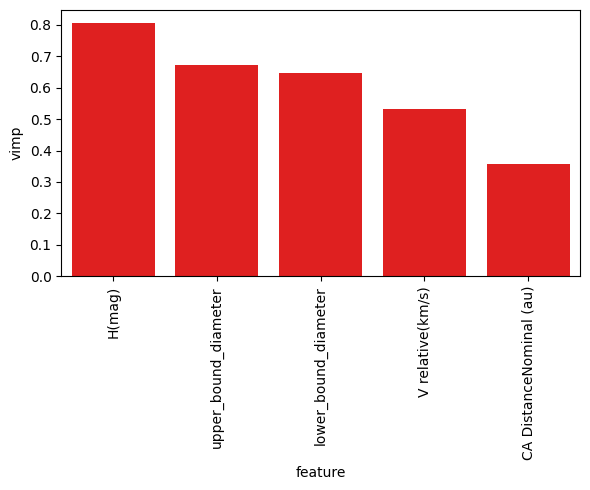

In [94]:
mic = mutual_info_regression(X, y)

mic_df = pd.DataFrame({"feature": X.columns, "vimp": mic}).sort_values(by="vimp", ascending=False)

plt.figure(figsize=(6, 5))
sns.barplot(data = mic_df, x='feature', y='vimp', color='red')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Machine Learning Models

## Train Test split


In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Logistic Regression

In [30]:
# Initialize the logistic regression model
log_reg_model = LogisticRegression()

# Train the model on the training data
log_reg_model.fit(X_train, y_train)

LogisticRegression()

## Decision Tree

### Selecting best parametes for Decision Tree

Best Parameters: {'max_depth': 20, 'min_samples_split': 2}
Best Score: 0.9841933682155675


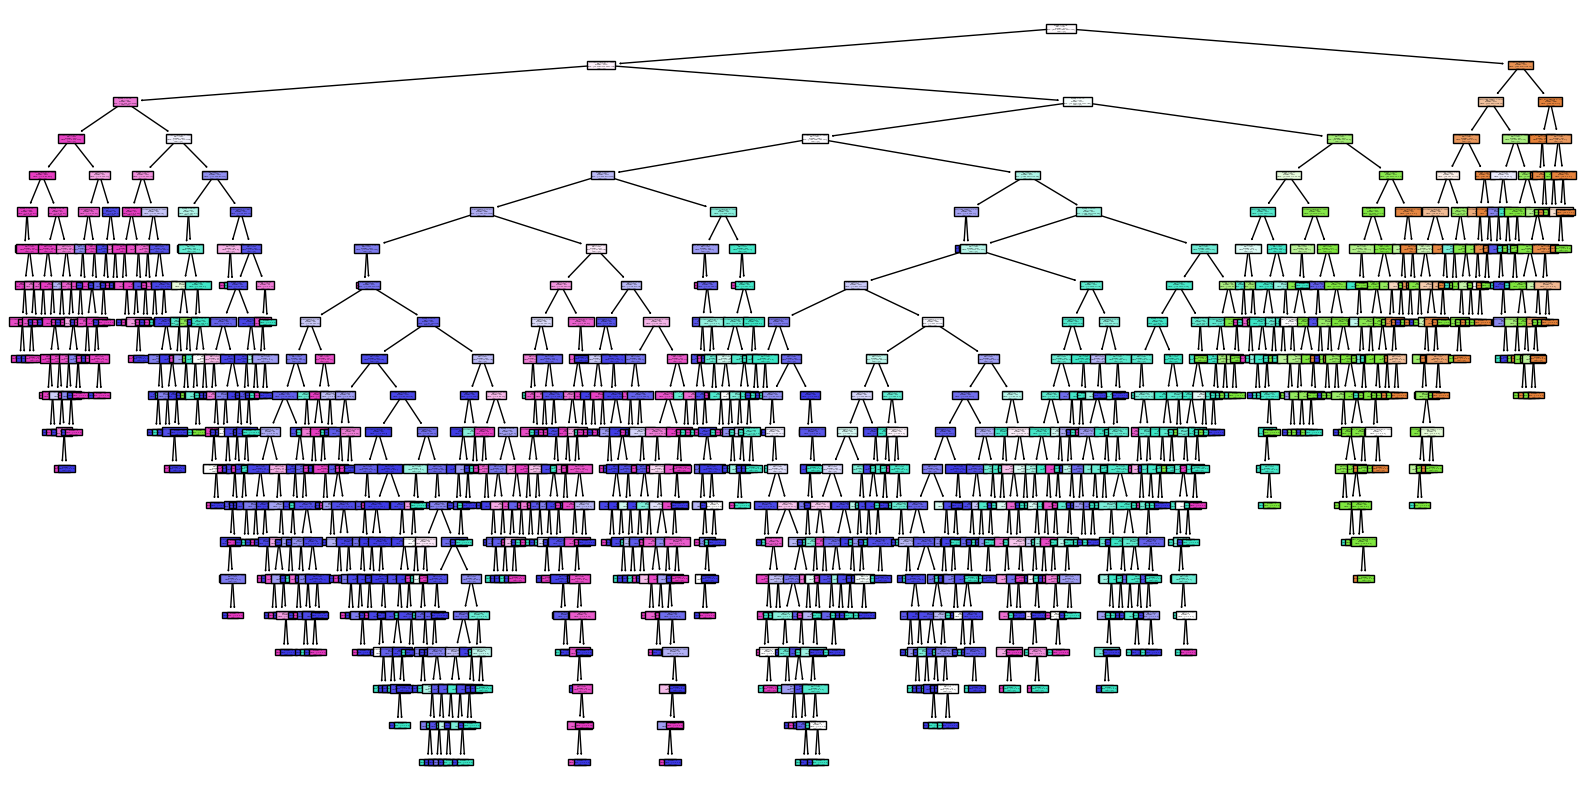

In [81]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import plot_tree

# Initialize the decision tree classifier
param_grid = {
    'max_depth': [3, 5, 7, 10, 12,15,20],                    # Maximum depth of the tree
    'min_samples_split': [2, 5, 10, 30,50,100]}          # Minimum number of samples required to split an internal node

# Initialize the decision tree classifier
decision_tree_model = DecisionTreeClassifier()

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=decision_tree_model,
                            param_grid=param_grid, 
                            cv=5,
                            scoring='accuracy')

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

decision_tree_model_best= grid_search.best_estimator_

### For decision tree visual
plt.figure(figsize=(20,10))  # Adjust the figure size as needed
plot_tree(decision_tree_model_best, filled=True, feature_names=X_train.columns, class_names=True)
plt.show()

In [82]:
# Initialize the decision tree classifier
decision_tree_model = DecisionTreeClassifier(max_depth=20, min_samples_split=2)

# Train the model on the training data
decision_tree_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=20)

## KNN

### Selecting the K-value

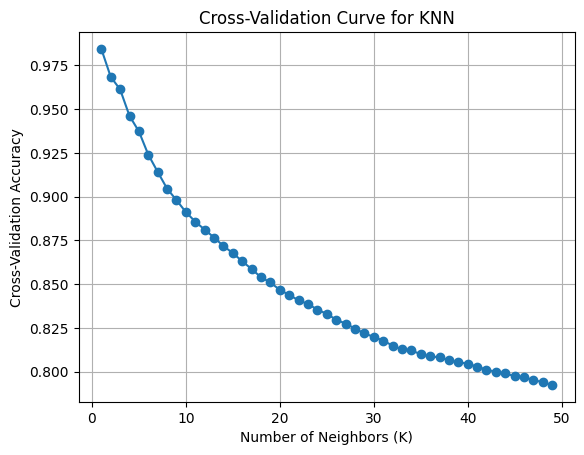

In [32]:
# Define range of neighbors (K) for cross-validation
neighbors = range(1, 50)

# Perform cross-validation for each value of K
cv_scores = []
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')  # 5-fold cross-validation
    cv_scores.append(scores.mean())

# Plot cross-validation curve
plt.figure()
plt.plot(neighbors, cv_scores, marker='o')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Cross-Validation Accuracy')
plt.title('Cross-Validation Curve for KNN')
plt.grid(True)
plt.show()

Let's select K-value as 3 as it has high accuracy and has reduced chance of overfitting compared to smaller k-values.

In [33]:
# Create a KNN model
knn = KNeighborsClassifier(n_neighbors=3)

# Train the KNN model using the specified features
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

## Neural Network

In [34]:
y_train = y_train.astype(float).astype(int)
y_test = y_test.astype(float).astype(int)

In [35]:
num_classes = 5
y_train_encoded = to_categorical(y_train , num_classes=num_classes)
y_test_encoded = to_categorical(y_test , num_classes=num_classes)

In [36]:
# Create and compile the model
nn_model1 = Sequential()
nn_model1.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))  # 128 neurons, relu activation
nn_model1.add(Dense(256, activation='relu'))  # 256 neurons, relu activation
nn_model1.add(Dense(5, activation='softmax'))  # 3 neurons for multi-class, softmax activation
nn_model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy','precision','f1_score'])
early_stopping = EarlyStopping(monitor='val_loss', patience=10, mode='min', verbose=1)

# Train the model with automatic validation split
history_model_1 = nn_model1.fit(X_train, y_train_encoded, epochs=100, batch_size=32, validation_split=0.2,callbacks=[early_stopping])

Epoch 1/100
783/783 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.4785 - f1_score: 0.4699 - loss: 1.4243 - precision: 0.5727 - val_accuracy: 0.5597 - val_f1_score: 0.5041 - val_loss: 0.9991 - val_precision: 0.7284
Epoch 2/100
783/783 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5290 - f1_score: 0.5168 - loss: 1.0506 - precision: 0.6709 - val_accuracy: 0.5120 - val_f1_score: 0.4094 - val_loss: 1.0613 - val_precision: 0.5768
Epoch 3/100
783/783 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5485 - f1_score: 0.5312 - loss: 0.9907 - precision: 0.6986 - val_accuracy: 0.5503 - val_f1_score: 0.4458 - val_loss: 0.9827 - val_precision: 0.6050
Epoch 4/100
783/783 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5722 - f1_score: 0.5513 - loss: 0.9473 - precision: 0.7191 - val_accuracy: 0.5939 - val_f1_score: 0.5669 - val_loss: 0.9107 - val_precision: 0.8014
Epoch 5/100
783/783 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5819 - f1_score: 0.5586 - loss: 0.9195 - precision: 0.7405 - val_accuracy

In [37]:
nn_model2 = Sequential()
nn_model2.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))  # 128 neurons, relu activation
nn_model2.add(Dense(128, activation='relu'))  # 256 neurons, relu activation
nn_model2.add(Dense(5, activation='softmax'))  # 3 neurons for multi-class, softmax activation
nn_model2.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['accuracy','precision','f1_score'])
early_stopping = EarlyStopping(monitor='val_loss', patience=10, mode='min', verbose=1)

# Train the model with automatic validation split
history_model_2 = nn_model2.fit(X_train, y_train_encoded, epochs=100, batch_size=32, validation_split=0.2,callbacks=[early_stopping])

Epoch 1/100
783/783 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4137 - f1_score: 0.3736 - loss: 2.3465 - precision: 0.7763 - val_accuracy: 0.4749 - val_f1_score: 0.3711 - val_loss: 1.1197 - val_precision: 0.8656
Epoch 2/100
783/783 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4699 - f1_score: 0.4202 - loss: 1.1184 - precision: 0.8165 - val_accuracy: 0.4749 - val_f1_score: 0.4096 - val_loss: 1.0583 - val_precision: 0.8068
Epoch 3/100
783/783 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4854 - f1_score: 0.4315 - loss: 1.0882 - precision: 0.7967 - val_accuracy: 0.4397 - val_f1_score: 0.4121 - val_loss: 1.0826 - val_precision: 0.8344
Epoch 4/100
783/783 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5014 - f1_score: 0.4506 - loss: 1.0744 - precision: 0.7986 - val_accuracy: 0.4773 - val_f1_score: 0.3680 - val_loss: 1.0844 - val_precision: 0.8509
Epoch 5/100
783/783 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5128 - f1_score: 0.4613 - loss: 1.0543 - precision: 0.7900 - val_accuracy

# Model Selection

## Performance on Train Data

In [40]:
def train_eval_model(model, printopt=True, cols = X_train.columns):

    # Evaluate the model on the test set
    y_pred = model.predict(X_train[cols]).astype(float).astype(int)

    if printopt:
        print("Evaluation on Train Set:")
        conf_matrix = confusion_matrix(y_train, y_pred)

        # Plot confusion matrix as heatmap
        plt.figure(figsize=(5, 5))
        sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", square=True, cbar=False, linecolor='black', linewidths=0.5,
                    xticklabels=['0', '1', '2', '3', '4'],
                    yticklabels=['0', '1', '2', '3', '4'])
        plt.xlabel('Predicted Labels')
        plt.ylabel('Actual Labels')
        plt.title('Confusion Matrix')
        plt.show()

        print("\nClassification Report:")
        print(classification_report(y_train, y_pred))

    # Calculate evaluation metrics
    return ({
    'Accuracy': round(accuracy_score(y_train, y_pred), 2),
    'Precision': round(precision_score(y_train, y_pred, average='weighted'), 2),
    'Recall': round(recall_score(y_train, y_pred, average='weighted'), 2),
    'F1-Score': round(f1_score(y_train, y_pred, average='weighted'), 2)
    })

### Logistic Regression

Evaluation on Train Set:


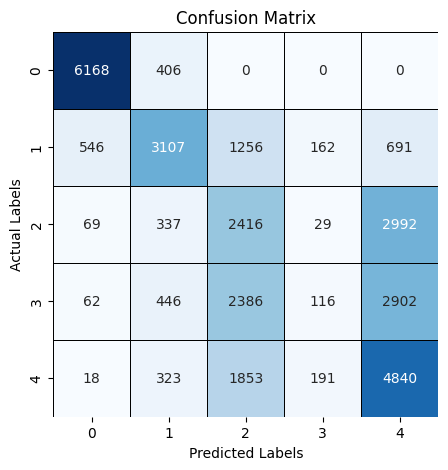


Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.94      0.92      6574
           1       0.67      0.54      0.60      5762
           2       0.31      0.41      0.35      5843
           3       0.23      0.02      0.04      5912
           4       0.42      0.67      0.52      7225

    accuracy                           0.53     31316
   macro avg       0.51      0.52      0.48     31316
weighted avg       0.51      0.53      0.49     31316



In [41]:
logistic_model_eval_train = train_eval_model(log_reg_model)

### Decision Tree

Evaluation on Train Set:


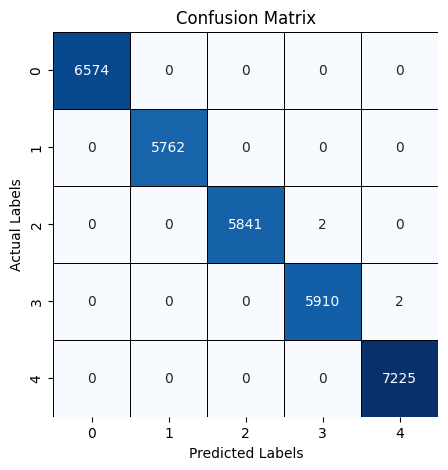


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6574
           1       1.00      1.00      1.00      5762
           2       1.00      1.00      1.00      5843
           3       1.00      1.00      1.00      5912
           4       1.00      1.00      1.00      7225

    accuracy                           1.00     31316
   macro avg       1.00      1.00      1.00     31316
weighted avg       1.00      1.00      1.00     31316



In [83]:
decision_model_eval_train = train_eval_model(decision_tree_model)

### KNN

Evaluation on Train Set:


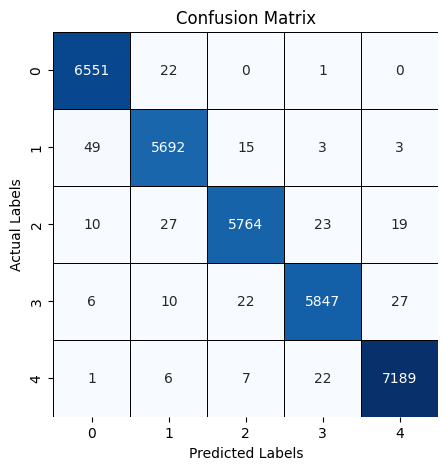


Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      6574
           1       0.99      0.99      0.99      5762
           2       0.99      0.99      0.99      5843
           3       0.99      0.99      0.99      5912
           4       0.99      1.00      0.99      7225

    accuracy                           0.99     31316
   macro avg       0.99      0.99      0.99     31316
weighted avg       0.99      0.99      0.99     31316



In [43]:
knn_model_eval_train = train_eval_model(knn)

## Neural Network

In [78]:
validation_accuracy_model_1 = history_model_1.history['val_accuracy'][-1]
print("Validation Accuracy Model 1:", validation_accuracy_model_1)

Validation Accuracy Model 1: 0.8703703880310059


In [79]:
validation_accuracy_model_2 = history_model_2.history['val_accuracy'][-1]
print("Validation Accuracy Model 2:", validation_accuracy_model_2)

Validation Accuracy Model 2: 0.5921136736869812


### Performance Overview

In [84]:
train_perf = pd.DataFrame([logistic_model_eval_train,decision_model_eval_train,knn_model_eval_train])

train_perf['Model'] =  ['Logistic Regression', 'Decision Tree', 'KNN']

train_perf[['Model','Accuracy','Precision','Recall','F1-Score']]

,Model,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression,0.53,0.51,0.53,0.49
1,Decision Tree,1.00,1.00,1.00,1.00
2,KNN,0.99,0.99,0.99,0.99


Based on the performance result on training data, Decision Tree and KNN models performs the best with F-1 score of 0.99 and 1.00. Hence, we selected those models. (Might be overfitting)

 Let's test their performace on test data.

## Performance on Test Data

In [47]:
def test_eval_model(model, printopt=True, cols = X_test.columns):

    # Evaluate the model on the test set
    y_pred = model.predict(X_test[cols]).astype(float).astype(int)

    if printopt:     

        print("Evaluation on Test Set:")
        conf_matrix = confusion_matrix(y_test, y_pred)

        # Plot confusion matrix as heatmap
        plt.figure(figsize=(5, 5))
        sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", square=True, cbar=False, linecolor='black', linewidths=0.5,
                    xticklabels=['0', '1', '2', '3', '4'],
                    yticklabels=['0', '1', '2', '3', '4'])
        plt.xlabel('Predicted Labels')
        plt.ylabel('Actual Labels')
        plt.title('Confusion Matrix')
        plt.show()

        print("\nClassification Report:")
        print(classification_report(y_test, y_pred))

    # Calculate evaluation metrics
    return ({
    'Accuracy': round(accuracy_score(y_test, y_pred), 2),
    'Precision': round(precision_score(y_test, y_pred, average='weighted'), 2),
    'Recall': round(recall_score(y_test, y_pred, average='weighted'), 2),
    'F1-Score': round(f1_score(y_test, y_pred, average='weighted'), 2)
    })

### Decision Tree

Evaluation on Test Set:


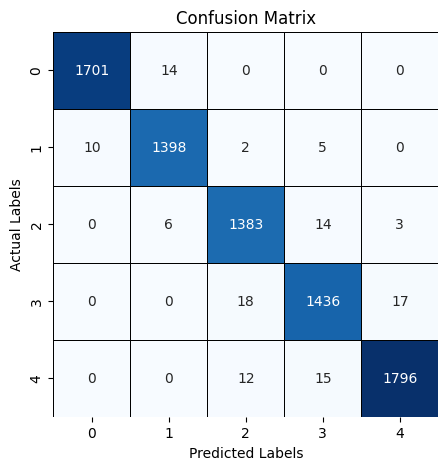


Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1715
           1       0.99      0.99      0.99      1415
           2       0.98      0.98      0.98      1406
           3       0.98      0.98      0.98      1471
           4       0.99      0.99      0.99      1823

    accuracy                           0.99      7830
   macro avg       0.98      0.98      0.98      7830
weighted avg       0.99      0.99      0.99      7830



In [85]:
decision_model_eval_test = test_eval_model(decision_tree_model)

### KNN

Evaluation on Test Set:


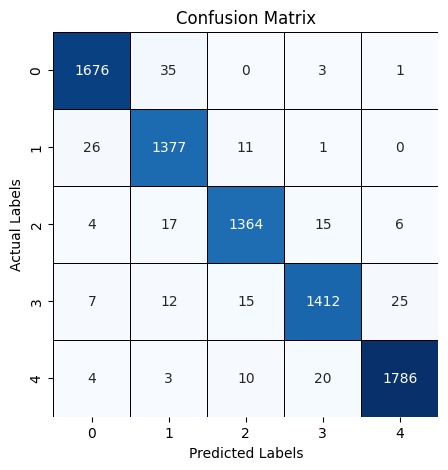


Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1715
           1       0.95      0.97      0.96      1415
           2       0.97      0.97      0.97      1406
           3       0.97      0.96      0.97      1471
           4       0.98      0.98      0.98      1823

    accuracy                           0.97      7830
   macro avg       0.97      0.97      0.97      7830
weighted avg       0.97      0.97      0.97      7830



In [49]:
knn_model_eval_test = test_eval_model(knn)

## Neural Network

In [76]:
test_loss, test_accuracy, test_precision, test_f1_score = nn_model1.evaluate(X_test, y_test_encoded)

print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)
print("Test Precision:", test_precision)
print("Test F1 Score:", np.mean(test_f1_score))

245/245 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8677 - f1_score: 0.8663 - loss: 0.2885 - precision: 0.8819
Test Loss: 0.28432634472846985
Test Accuracy: 0.8679438233375549
Test Precision: 0.8832520842552185
Test F1 Score: 0.86631584


In [77]:
test_loss, test_accuracy, test_precision, test_f1_score = nn_model2.evaluate(X_test, y_test_encoded)

print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)
print("Test Precision:", test_precision)
print("Test F1 Score:", np.mean(test_f1_score))

245/245 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5983 - f1_score: 0.5462 - loss: 0.8977 - precision: 0.7387
Test Loss: 0.8845592141151428
Test Accuracy: 0.5991060137748718
Test Precision: 0.7433056235313416
Test F1 Score: 0.54567486


### Test Performance Overview

In [87]:
test_perf = pd.DataFrame([decision_model_eval_test,knn_model_eval_test])

test_perf['Model'] =  [ 'Decision Tree', 'KNN']

test_perf[['Model','Accuracy','Precision','Recall','F1-Score']]

,Model,Accuracy,Precision,Recall,F1-Score
0,Decision Tree,0.99,0.99,0.99,0.99
1,KNN,0.97,0.97,0.97,0.97


Both the models performs well in test data as well with F-1 score of 0.99 and 0.97

# Ensemble Model

Let's create some weak learners logistic regression models

In [51]:
# Initialize the logistic regression model
log_reg_model1 = LogisticRegression()

# Train the model on the training data
log_reg_model1.fit(X_train, y_train)

print(f'Train Performance: {train_eval_model(log_reg_model1, printopt=False)}')
print(f'Test Performance: {test_eval_model(log_reg_model1, printopt=False)}')

Train Performance: {'Accuracy': 0.53, 'Precision': 0.51, 'Recall': 0.53, 'F1-Score': 0.49}
Test Performance: {'Accuracy': 0.53, 'Precision': 0.51, 'Recall': 0.53, 'F1-Score': 0.5}


In [52]:
# Initialize the logistic regression model
log_reg_model2 = LogisticRegression()

# Train the model on the training data
cols = ['V relative(km/s)', 'H(mag)']
log_reg_model2.fit(X_train[cols], y_train)

print(f"Train Performance: {train_eval_model(log_reg_model2, printopt=False, cols=cols)}")
print(f"Test Performance: {test_eval_model(log_reg_model2, printopt=False, cols=cols)}")

Train Performance: {'Accuracy': 0.57, 'Precision': 0.55, 'Recall': 0.57, 'F1-Score': 0.54}
Test Performance: {'Accuracy': 0.57, 'Precision': 0.55, 'Recall': 0.57, 'F1-Score': 0.55}


In [53]:
# Initialize the logistic regression model
log_reg_model3 = LogisticRegression()

# Train the model on the training data
cols = ['V relative(km/s)','lower_bound_diameter',	'upper_bound_diameter']
log_reg_model3.fit(X_train[cols], y_train)

print(f"Train Performance: {train_eval_model(log_reg_model3, printopt=False, cols=cols)}")
print(f"Test Performance: {test_eval_model(log_reg_model3, printopt=False, cols=cols)}")

Train Performance: {'Accuracy': 0.51, 'Precision': 0.48, 'Recall': 0.51, 'F1-Score': 0.46}
Test Performance: {'Accuracy': 0.52, 'Precision': 0.64, 'Recall': 0.52, 'F1-Score': 0.47}


All the models peforms poorly with low accuracy and F-1 scores. Let's pair them up using different ensemble models and evaluate the performance.

## Stacking ensemble method

In [88]:
base_models = [('logistic', log_reg_model), ('logistic1', log_reg_model1), ('logistic2', log_reg_model2), ('logistic3', log_reg_model3), ('knn', knn), ('decision tree',decision_tree_model)]
meta_learner = LogisticRegression() 

stacking_clf = StackingClassifier(estimators=base_models, final_estimator=meta_learner)
stacking_clf.fit(X_train, y_train)

StackingClassifier(estimators=[('logistic', LogisticRegression()),
                               ('logistic1', LogisticRegression()),
                               ('logistic2', LogisticRegression()),
                               ('logistic3', LogisticRegression()),
                               ('knn', KNeighborsClassifier(n_neighbors=3)),
                               ('decision tree',
                                DecisionTreeClassifier(max_depth=20))],
                   final_estimator=LogisticRegression())

## Voting ensemble method

In [89]:
estimators = [('logistic', log_reg_model), ('logistic1', log_reg_model1), ('logistic2', log_reg_model2), ('logistic3', log_reg_model3), ('knn', knn), ('decision tree',decision_tree_model)]
voting_clf = VotingClassifier(estimators=estimators, voting='hard')  

voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('logistic', LogisticRegression()),
                             ('logistic1', LogisticRegression()),
                             ('logistic2', LogisticRegression()),
                             ('logistic3', LogisticRegression()),
                             ('knn', KNeighborsClassifier(n_neighbors=3)),
                             ('decision tree',
                              DecisionTreeClassifier(max_depth=20))])

## Ensemble Performance Overview - Train Data

Evaluation on Train Set:


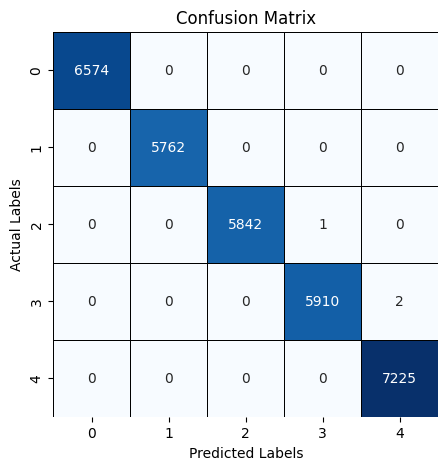


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6574
           1       1.00      1.00      1.00      5762
           2       1.00      1.00      1.00      5843
           3       1.00      1.00      1.00      5912
           4       1.00      1.00      1.00      7225

    accuracy                           1.00     31316
   macro avg       1.00      1.00      1.00     31316
weighted avg       1.00      1.00      1.00     31316



In [90]:
stacking_performance_train = train_eval_model(stacking_clf)

Evaluation on Train Set:


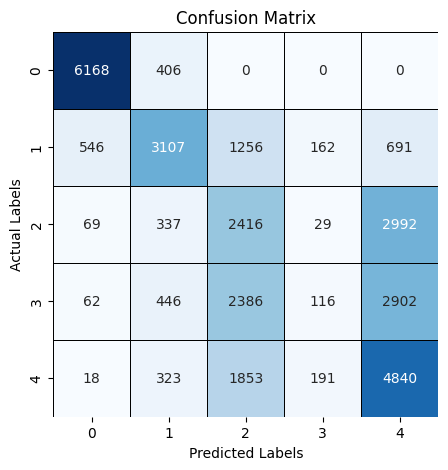


Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.94      0.92      6574
           1       0.67      0.54      0.60      5762
           2       0.31      0.41      0.35      5843
           3       0.23      0.02      0.04      5912
           4       0.42      0.67      0.52      7225

    accuracy                           0.53     31316
   macro avg       0.51      0.52      0.48     31316
weighted avg       0.51      0.53      0.49     31316



In [68]:
voting_performance_train = train_eval_model(voting_clf)

In [91]:
train_perf = pd.DataFrame([stacking_performance_train,voting_performance_train])

train_perf['Ensemble Method'] =  ['Stacking', 'Voting']

train_perf[['Ensemble Method','Accuracy','Precision','Recall','F1-Score']]

,Ensemble Method,Accuracy,Precision,Recall,F1-Score
0,Stacking,1.00,1.00,1.00,1.00
1,Voting,0.53,0.51,0.53,0.49


The fundamental difference between voting and stacking is how the final aggregation works.

Voting aglomerates results of classifier's decisions by taking the class which appears in most cases or by weights of the predictions a whereas stacking performs the final aggregation by using a blender/meta classifier.

In our case Stacking model performed better than Voting ensemble model. Because, the 4 weak learners overpowered the knn model due to more number of wrong predictions.

Let's evaluate the stacking ensemble models with test data

## Ensemble Performance Overview - Test Data

Evaluation on Test Set:


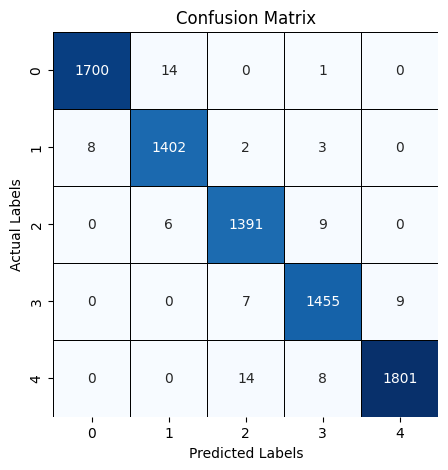


Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1715
           1       0.99      0.99      0.99      1415
           2       0.98      0.99      0.99      1406
           3       0.99      0.99      0.99      1471
           4       1.00      0.99      0.99      1823

    accuracy                           0.99      7830
   macro avg       0.99      0.99      0.99      7830
weighted avg       0.99      0.99      0.99      7830



{'Accuracy': 0.99, 'Precision': 0.99, 'Recall': 0.99, 'F1-Score': 0.99}

In [92]:
test_eval_model(stacking_clf)

Our stacking ensemble model performs well with unsen data as well with F-1 score of 0.97

# Conclusions

This project investigated the factors influencing the rarity of asteroid close approaches and explored the effectiveness of machine learning models in predicting and classifying such encounters. We utilized a NASA CNEOS dataset containing information on various NEO characteristics, focusing on close approaches within 10 LD.

__Key Findings:__

- Our exploratory data analysis revealed significant correlations between rarity and factors like velocity, distance, and absolute magnitude.
- Machine learning models, particularly the KNN classifier, achieved good performance in classifying NEO encounters based on rarity.
- In our case, the stacking ensemble model performed better than voting ensemble model due to more number of weak learners.

__Addressing Research Questions:__

- __Factors Contributing to Rarity:__ The analysis identified absolute magnitude and diameter as key factors influencing rarity.
- __Develop multiple ML models:__ Successfully created ML models like logistic regression, KNN, Decision Tree, Neural Network with promising capabilities in predicting rarity based on various NEO characteristics.
- __Best Performing Model:__ The project successfully developed a best performing Decision Tree classification model with an __accuracy and F-1 score of 0.99__.

## Future Scope

Expanding the dataset to include a broader range of NEO characteristics related to hazard could potentially improve the overall usecase.